In [1]:
#!pip install --upgrade pip

In [2]:
import pymysql
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import os

In [3]:
con = pymysql.connect(host='192.168.0.150', user= 'jin', passwd='tiger', db='final_project', charset='utf8',autocommit=True)

# dataset

In [4]:
cur=con.cursor(pymysql.cursors.DictCursor)
data = pd.read_sql('select * from animalinfo3', con)

In [5]:
#cur=con.cursor(pymysql.cursors.DictCursor)
#pred_set = pd.read_sql("select * from animalinfo3 where status like '보호중'", con)

In [6]:
data.columns

Index(['index', 'regnum', 'noticeend', 'age', 'color', 'animal', 'species',
       'neuteryn', 'sex', 'feature', 'weight', 'status', 'outer_health',
       'inner_health', 'disable', 'personality', 'care'],
      dtype='object')

## use column make dataframe

In [7]:
aa = data.drop(['index', 'regnum', 'noticeend','age', 'color', 'animal', 'species','feature','weight'], axis=1)[2000:4000]


In [8]:
aa

,neuteryn,sex,status,outer_health,inner_health,disable,personality,care
2000,N,M,종료(입양),a,a,None,None,None
2001,N,M,보호중,None,None,None,None,y
2002,N,M,종료(입양),None,None,None,None,None
2003,Y,M,보호중,None,None,None,None,None
2004,N,F,종료(입양),a,None,None,None,None
...,...,...,...,...,...,...,...,...
3995,N,M,종료(입양),None,None,None,None,None
3996,N,F,종료(입양),None,None,None,None,None
3997,N,M,종료(입양),None,None,None,None,None
3998,N,M,종료(입양),None,None,None,None,None


In [9]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 2000 to 3999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neuteryn      2000 non-null   object
 1   sex           2000 non-null   object
 2   status        2000 non-null   object
 3   outer_health  369 non-null    object
 4   inner_health  384 non-null    object
 5   disable       35 non-null     object
 6   personality   451 non-null    object
 7   care          507 non-null    object
dtypes: object(8)
memory usage: 125.1+ KB


In [10]:
aa =aa.fillna(0)

In [11]:
aa.describe()

,neuteryn,sex,status,outer_health,inner_health,disable,personality,care
count,2000,2000,2000,2000,2000,2000,2000,2000
unique,3,3,5,3,3,2,3,2
top,N,M,종료(자연사),0,0,0,0,0
freq,1381,894,660,1631,1616,1965,1549,1493


In [12]:
aa

,neuteryn,sex,status,outer_health,inner_health,disable,personality,care
2000,N,M,종료(입양),a,a,0,0,0
2001,N,M,보호중,0,0,0,0,y
2002,N,M,종료(입양),0,0,0,0,0
2003,Y,M,보호중,0,0,0,0,0
2004,N,F,종료(입양),a,0,0,0,0
...,...,...,...,...,...,...,...,...
3995,N,M,종료(입양),0,0,0,0,0
3996,N,F,종료(입양),0,0,0,0,0
3997,N,M,종료(입양),0,0,0,0,0
3998,N,M,종료(입양),0,0,0,0,0


In [13]:
for i in aa.columns:
    print(aa[i].value_counts())

N    1381
U     578
Y      41
Name: neuteryn, dtype: int64
M    894
F    873
Q    233
Name: sex, dtype: int64
종료(자연사)    660
보호중        529
종료(입양)     493
종료(안락사)    299
종료(기증)      19
Name: status, dtype: int64
0    1631
a     233
s     136
Name: outer_health, dtype: int64
0    1616
a     265
s     119
Name: inner_health, dtype: int64
0    1965
y      35
Name: disable, dtype: int64
0    1549
f     301
u     150
Name: personality, dtype: int64
0    1493
y     507
Name: care, dtype: int64


## predict set (protect)out

In [14]:
#can't display korean >>eng
#보호중, 종료(기증), 종료(안락사), 종료(입양), 종료(자연사)
aa.loc[aa['status'] =='보호중', 'status'] = 'protect'
aa.loc[aa['status'] =='종료(기증)', 'status'] = 'donate'
aa.loc[aa['status'] =='종료(안락사)', 'status'] = 'euthanasia'
aa.loc[aa['status'] =='종료(입양)', 'status'] = 'adopt'
aa.loc[aa['status'] =='종료(자연사)', 'status'] = 'natural_death'


In [15]:
#객체에 status가 보호중인 index를 저장
drop_adopt = aa[aa['status'] == 'protect'].index

In [16]:
bb = aa.drop(drop_adopt)

In [17]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 2000 to 3999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   neuteryn      1471 non-null   object
 1   sex           1471 non-null   object
 2   status        1471 non-null   object
 3   outer_health  1471 non-null   object
 4   inner_health  1471 non-null   object
 5   disable       1471 non-null   object
 6   personality   1471 non-null   object
 7   care          1471 non-null   object
dtypes: object(8)
memory usage: 103.4+ KB


In [18]:
os.getcwd()

'/home/sundooedu/myweb/multiple'

In [19]:
path = ('NanumBarunGothic.ttf')
fontname = font_manager.FontProperties(fname=path).get_name()
rc('font', family=fontname)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


neuteryn


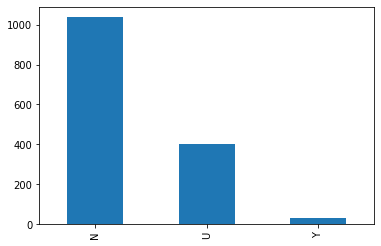

sex


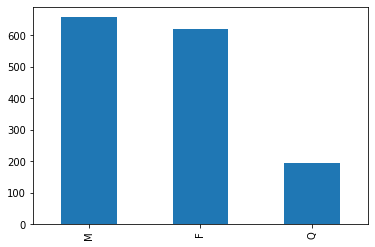

status


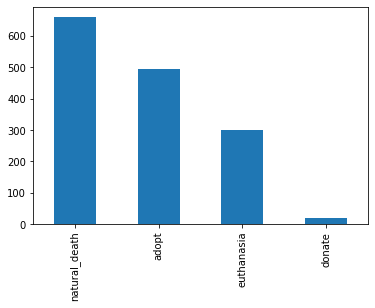

outer_health


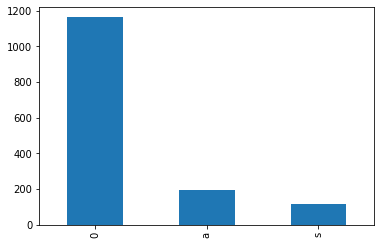

inner_health


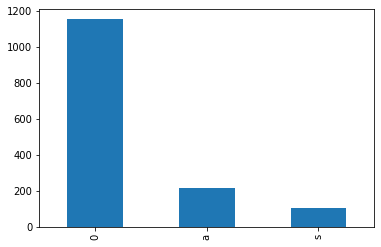

disable


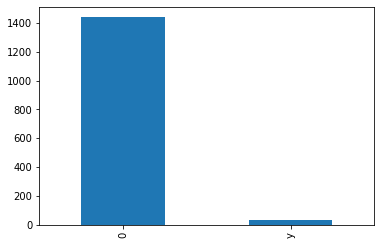

personality


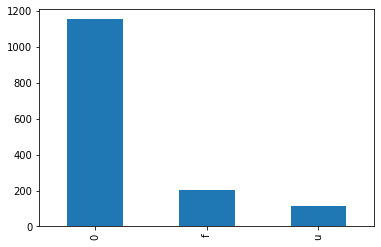

care


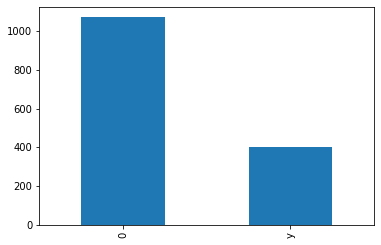

In [20]:
for i in bb.columns:
    print(i)
    bb[i].value_counts().plot(kind = 'bar')
    plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
y = bb['status']
x = bb.drop('status', axis=1)

In [23]:
x.shape, y.shape

((1471, 7), (1471,))

## preprocessing

y : adopt=1, others=0

In [24]:
y = y.replace('donate','end').replace('euthanasia','end').replace('natural_death','end')

In [25]:
y.value_counts()

end      978
adopt    493
Name: status, dtype: int64

In [26]:
bb.columns

Index(['neuteryn', 'sex', 'status', 'outer_health', 'inner_health', 'disable',
       'personality', 'care'],
      dtype='object')

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3)

In [28]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1029, 7), (1029,), (442, 7), (442,))

dummy

In [29]:
xtrain_1 = pd.get_dummies(xtrain,columns=['neuteryn', 'sex','outer_health', 'inner_health', 'disable',
       'personality', 'care'], drop_first = True)
xtest_1 = pd.get_dummies(xtest,columns=['neuteryn', 'sex','outer_health', 'inner_health', 'disable',
       'personality', 'care'], drop_first = True)
#ytrain_1 = pd.get_dummies(ytrain, drop_first = True)
#ytest_1 = pd.get_dummies(ytest, drop_first = True)

In [30]:
xtrain_1.shape, ytrain.shape, xtest_1.shape, ytest.shape

((1029, 12), (1029,), (442, 12), (442,))

In [31]:
xtrain_1

,neuteryn_U,neuteryn_Y,sex_M,sex_Q,outer_health_a,outer_health_s,inner_health_a,inner_health_s,disable_y,personality_f,personality_u,care_y
2956,0,0,0,0,0,0,0,0,0,0,0,1
3083,0,0,0,1,0,0,1,0,0,0,0,0
3618,0,0,1,0,1,0,0,0,0,0,0,0
3120,0,0,1,0,0,0,0,0,0,0,0,1
3839,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3900,0,0,1,0,0,0,0,0,0,0,0,1
2021,0,0,1,0,0,0,0,0,0,0,0,1
3607,0,0,1,0,0,1,0,0,0,0,0,0
3835,0,0,0,1,0,0,0,0,0,0,0,0


In [32]:
y

2000    adopt
2002    adopt
2004    adopt
2005    adopt
2006      end
        ...  
3995    adopt
3996    adopt
3997    adopt
3998    adopt
3999      end
Name: status, Length: 1471, dtype: object

In [33]:
for i in xtrain_1.columns:
    print(xtrain_1[i].value_counts())

0    752
1    277
Name: neuteryn_U, dtype: int64
0    1006
1      23
Name: neuteryn_Y, dtype: int64
0    567
1    462
Name: sex_M, dtype: int64
0    891
1    138
Name: sex_Q, dtype: int64
0    900
1    129
Name: outer_health_a, dtype: int64
0    951
1     78
Name: outer_health_s, dtype: int64
0    880
1    149
Name: inner_health_a, dtype: int64
0    958
1     71
Name: inner_health_s, dtype: int64
0    1007
1      22
Name: disable_y, dtype: int64
0    883
1    146
Name: personality_f, dtype: int64
0    959
1     70
Name: personality_u, dtype: int64
0    752
1    277
Name: care_y, dtype: int64


In [34]:
#xtrain_1.astype(float)

## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics


In [47]:
logis = LogisticRegression()

In [48]:
grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000], 'max_iter':[500, 1000, 2000]}
gscv = GridSearchCV(logis, param_grid=grid_values, return_train_score=True)

In [49]:
gscv.fit(xtrain_1, ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [50]:
gscv.best_params_, gscv.best_index_, gscv.best_score_, gscv.best_estimator_

({'C': 0.1, 'max_iter': 500},
 6,
 0.6822259057542033,
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=500,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

In [51]:
logis1 = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=500,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)

In [52]:
logis1.fit(xtrain_1,ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction = logis1.predict(xtest_1)

In [86]:
confusion_matrix(ytest, prediction)

array([[ 33, 113],
       [ 10, 286]])

In [85]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

       adopt       0.77      0.23      0.35       146
         end       0.72      0.97      0.82       296

    accuracy                           0.72       442
   macro avg       0.74      0.60      0.59       442
weighted avg       0.73      0.72      0.67       442



In [55]:
accuracy_score(ytest,prediction)

0.7217194570135747

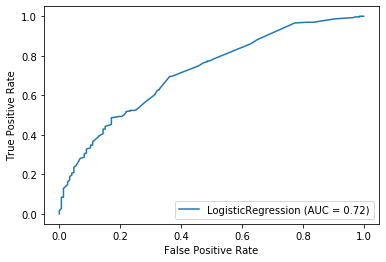

In [56]:
metrics.plot_roc_curve(logis1,xtest_1, ytest)

## Decision Tree (??)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
tree = DecisionTreeClassifier()

In [74]:
grid_values1 = {'criterion':['gini','entropy'], 'max_depth' : [5,7,10], 'min_samples_split':[3,5] }

In [75]:
gscv1 = GridSearchCV(tree, param_grid=grid_values1, return_train_score=True)

In [76]:
gscv1.fit(xtrain_1,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [77]:
gscv1.best_params_, gscv1.best_score_, gscv1.best_estimator_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3},
 0.6647454416291737,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=10, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=3,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'))

In [78]:
tree1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=10, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=3,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')

In [79]:
tree1.fit(xtrain_1,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
predict_tree = tree1.predict(xtest_1)

In [115]:
#!pip install graphviz

In [116]:
from sklearn.tree import export_graphviz
import graphviz

In [123]:
pred_tree = tree1.predict(xtest_1)

In [124]:
accuracy_score(ytest,pred_tree)

0.6334841628959276

In [ ]:
plot_feature_importances_cancer(forest)

## Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rdf = RandomForestClassifier(n_estimators=100)

In [134]:
params_rdf = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [135]:
gscv2 = GridSearchCV(rdf, param_grid=params_rdf, return_train_score=True)

In [136]:
gscv2.fit(xtrain_1,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [128]:
rdf.fit(xtrain_1,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
gscv2.best_params_, gscv2.best_score_ ,gscv2.best_estimator_

({'max_depth': 6,
  'min_samples_leaf': 8,
  'min_samples_split': 16,
  'n_estimators': 100},
 0.6812408240587261,
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=6, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=8, min_samples_split=16,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False))

In [141]:
rdf1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=6, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=8, min_samples_split=16,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

In [142]:
rdf1.fit(xtrain_1,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
pred_rdf= rdf1.predict(xtest_1)

In [144]:
accuracy_score(ytest,pred_rdf)

0.7217194570135747

random forest visualization

In [145]:
import seaborn as sns

In [146]:
fea_import = rdf1.feature_importances_

In [153]:
fea_importances = pd.Series(fea_import, index = xtrain_1.columns)
rdf_data = fea_importances.sort_values(ascending = False)

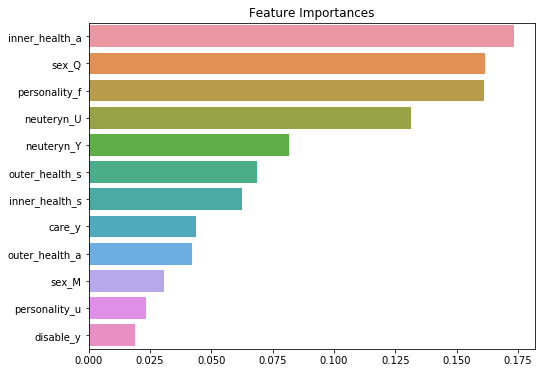

In [154]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x = rdf_data, y = rdf_data.index)

plt.show()

## svm

In [158]:
from sklearn.svm import SVC

In [159]:
params_svc= {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf','sigmoid']}

In [161]:
gscv3 = GridSearchCV(SVC(), param_grid=params_svc, return_train_score=True)

In [162]:
gscv3.fit(xtrain_1,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [169]:
gscv3.best_params_, gscv3.best_score_, gscv3.best_estimator_,

({'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 0.677357328913095,
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))

In [170]:
svc = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)

In [171]:
svc.fit(xtrain_1,ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [172]:
pred_svc= svc.predict(xtest_1)

In [173]:
accuracy_score(ytest,pred_svc)

0.7171945701357466

## Ensemble(Logistic, DT, SVM)

In [176]:
enlog = LogisticRegression()
enrf = DecisionTreeClassifier()
ensvm = SVC()

In [177]:
from sklearn.ensemble import VotingClassifier

In [197]:
ensemble_h = VotingClassifier(estimators=[('lr',enlog),('rf',enrf),('sv',ensvm)], voting='hard')
#ensemble_s = VotingClassifier(estimators=[('lr',enlog),('rf',enrf),('sv',ensvm)], voting='soft')

In [198]:
models = [enlog,enrf,ensvm, ensemble_h]

In [199]:
for i in models:
    i.fit(xtrain_1,ytrain)
    pred_1 = i.predict(xtest_1)
    accuracy_score(ytest,pred_1)
    print(i,'\n','accuracy_score:',accuracy_score(ytest,pred_1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 accuracy_score: 0.7217194570135747
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
 accuracy_score: 0.6312217194570136
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probabi

In [223]:
#DL save
logis1.save('./logis.h5')

AttributeError: 'LogisticRegression' object has no attribute 'save'

## save

In [224]:
import pickle

In [228]:
pickle.dump(logis1,open('logis.pkl','wb'))
pickle.dump(tree1,open('tree1.pkl','wb'))
pickle.dump(rdf1,open('rdf1.pkl','wb'))
pickle.dump(svc,open('svc.pkl','wb'))
pickle.dump(ensemble_h,open('lensemble_h.pkl','wb'))

In [ ]:
#aaa = pickle.load(open('logis.pkl','rb'))